## Homework 2

#### Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/  (60 points)

##### Answer the following questions with the help of  one or more visualizations  per  question (20 for each question)
1. Which pair of variables are highly correlated (leave out the class label - first column)?
2. Are there any pair of variables that have a non-linear relationship? 
3. When comparing wine cultivar type 1,2, and 3, Do any of the type(s) have data points with high hue and low colour intensity?


#### Dataset:  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/   (40 points)

##### Answer the following questions with the help of  one or more visualizations  per  question (20 for each question)
1. Are there certain combinations of make and body-styles that have high city-mpg?
2. When looking at cars with the diesel and gas fuel-types, do either of these fuel types have cars with high highway-mpg and high price? Approximately, which fuel-type has more cars in the of high highway-mpg and high price region? Among those cars what is the lowest num-of-cylinders value?

**Note:**
1. Normalize data if required
2. Missing values can be filled in with any technique you learnt in your Data Mining courses

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading in data set and creating the column names.

data = pd.read_csv('wine.data', names=['Class','Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ASH', 'Magnesium', 'Total Phenols','Flavanoids','Nonflavanoid Phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
data

,Class,Alcohol,Malic Acid,Ash,Alcalinity of ASH,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


1. Which pair of variables are highly correlated (leave out the class label - first column)?

Total Phenols                 Flavanoids       0.864564
OD280/OD315 of diluted wines  Flavanoids       0.787194
                              Total Phenols    0.699949
Proanthocyanins               Flavanoids       0.652692
Proline                       Alcohol          0.643720
Proanthocyanins               Total Phenols    0.612413
dtype: float64

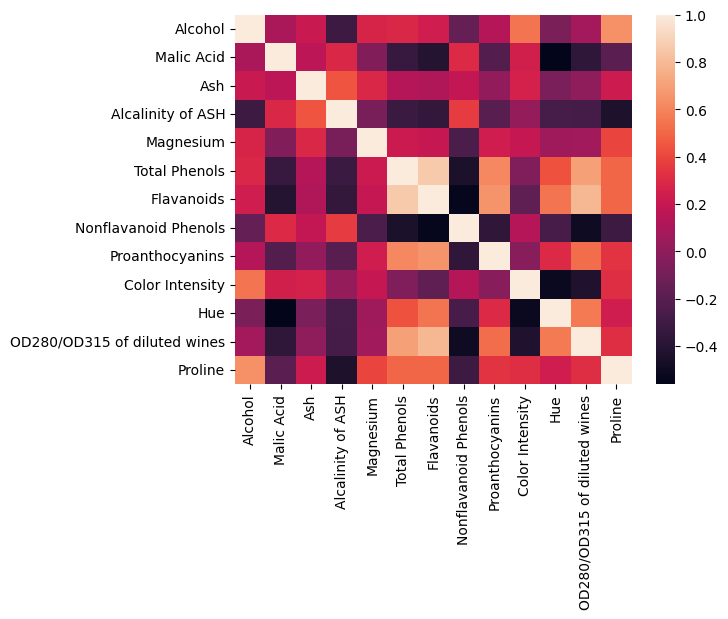

In [4]:
#we want to see if any attributes are correlated so I will make a correlation matrix and graph it using a heat map.
#drop first row (Class)
cormat = data.drop('Class',axis=1)
cormat = cormat.corr()
#cormat = round(cormat,2)

sns.heatmap(cormat)
corData = cormat.unstack()
corData = corData.sort_values(kind='qiocksort', ascending=False)

#skip first 13 as they are correlated aggainst themseleves
#showing top 5 pairs
corData[13:24:2]


As we can see from the heat map, the highest correlated pair is Total Phenols and Flavanoids.

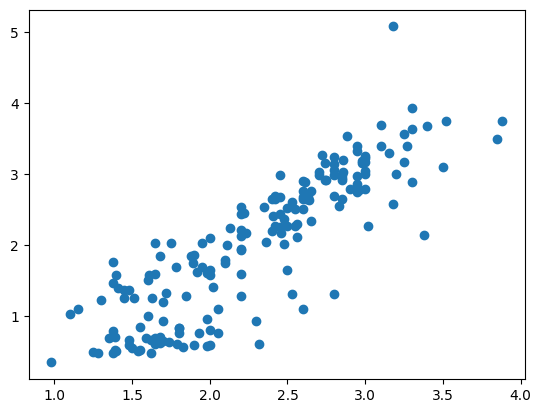

In [88]:
#here are the two ploted together the see the relationship.

plt.scatter(data['Total Phenols'],data['Flavanoids'])
plt.show()

#it does indeed look to be a linear relationship

2. Are there any pair of variables that have a non-linear relationship?

Total Phenols                 Flavanoids       0.701999
Proanthocyanins               Flavanoids       0.534615
OD280/OD315 of diluted wines  Flavanoids       0.520448
                              Total Phenols    0.478267
Proanthocyanins               Total Phenols    0.466517
Proline                       Alcohol          0.449387
dtype: float64

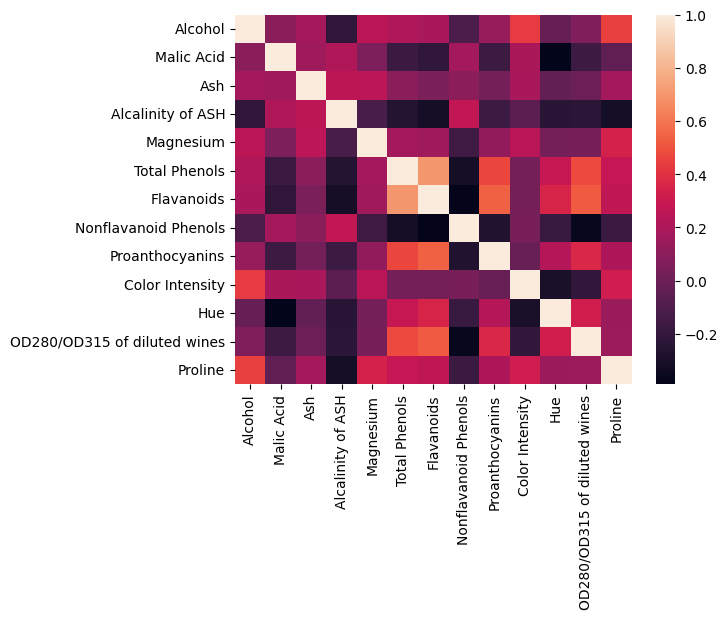

In [5]:
#I will use kendall correlation this time as it is better for non linear relationships 
NLcormat = data.drop('Class',axis=1)
NLcormat = NLcormat.corr('kendall')

sns.heatmap(NLcormat)
NLcorData = NLcormat.unstack()
NLcorData = NLcorData.sort_values(kind='qiocksort', ascending=False)

NLcorData[13:24:2]

#From these results of the heat map I would not consider any of the relationships to be non linear. 


3. When comparing wine cultivar type 1,2, and 3, Do any of the type(s) have data points with high hue and low colour intensity?

[1 2 3]


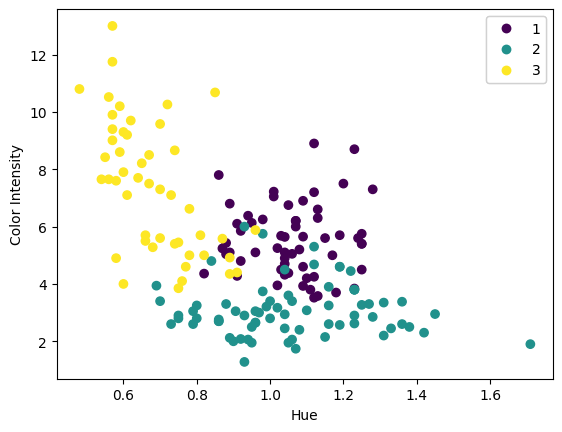

In [7]:
#I will plot hue and color intensity together and color the points by class to see if there are any high hue, low colour intensity points

fig, ax = plt.subplots()

scatter = ax.scatter(data['Hue'], data['Color Intensity'], c=data['Class'])
legend1 = ax.legend(*scatter.legend_elements())
ax.add_artist(legend1)
plt.xlabel('Hue')
plt.ylabel('Color Intensity')
print(data.Class.unique())
plt.show()


As we can see from the scatter plot, type 2 has many points with high hue and a low color intensity.

Data set #2 imports-85

In [8]:
names = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

data2 = pd.read_csv('imports-85.data', names=names)
data2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


1. Are there certain combinations of make and body-styles that have high city-mpg?

In [44]:
#I will start by grouping the cars by make and body style and see what group on average has the highest city-mpg
temp = data2.groupby(['make','body-style'])
tempData = temp['city-mpg'].mean().to_frame(name='mean-city-mpg').reset_index()
tempData = tempData.sort_values(['mean-city-mpg'], ascending=False)
tempData['makeBody'] = tempData['make'] + ' ' + tempData['body-style']

In [11]:
import textwrap

def wrap_labels(ax,width, blw=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, break_long_words=blw))
    
    ax.set_xticklabels(labels, rotation=0)

C:\Users\Griffin\AppData\Local\Temp\ipykernel_1104\3730975032.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0)


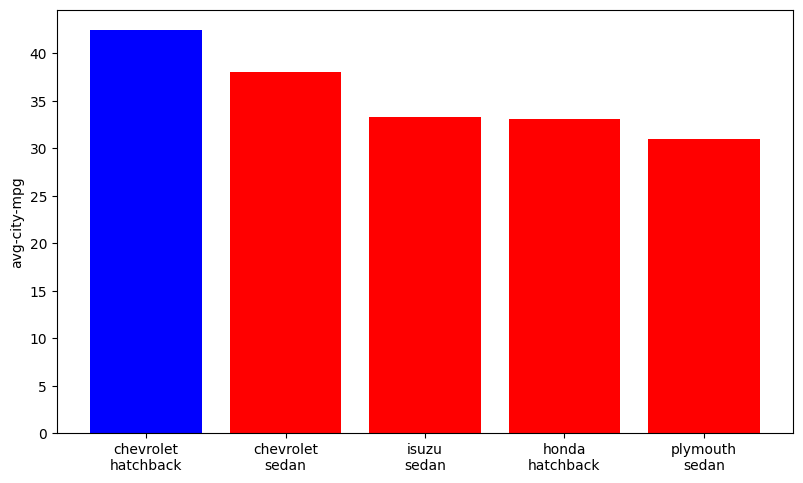

In [53]:


fig, ax = plt.subplots()
fig.set_size_inches(9.5,5.5)
bar = ax.bar(tempData['makeBody'].head(5), height=tempData['mean-city-mpg'].head(5), color=['b','r','r','r','r'])
wrap_labels(ax,10)
ax.set_ylabel('avg-city-mpg')

plt.show()

As we can see from the bar graph above, the make and body style combo that had the highest city mpg on average was chevrolet and hatchback. 

 When looking at cars with the diesel and gas fuel-types, do either of these fuel types have cars with high highway-mpg and high price? Approximately, which fuel-type has more cars in the of high highway-mpg and high price region? Among those cars what is the lowest num-of-cylinders value?

In [59]:

#remove null values
data2 = data2[data2.price != '?']
#making price into an int to graph
data2['price'] = data2['price'].astype(int)

#making fuel type numbered to use for coloring 1=gas 0=deisel
data2['fuel-type-num'] = [1 if x == 'gas' else 0 for x in data2['fuel-type']]

In [82]:
#find avereage price and highway-mpg to see what cars are consider in the high range
print(data2['price'].mean()," ",data2['highway-mpg'].astype(int).mean())

#We are looking for all cars in the price range higher than 13207 and highway-mpg hight than 31

highCars = data2[(data2['price']>= 13207) & (data2['highway-mpg'].astype(int)>=31)]
CarsDict = {'diesel': 0, 'gas': 0}

for car in highCars['fuel-type']:
    if car == 'diesel':
        CarsDict['diesel'] += 1
    else:
        CarsDict['gas'] += 1

CarsDict


13207.129353233831   30.686567164179106


{'diesel': 4, 'gas': 0}

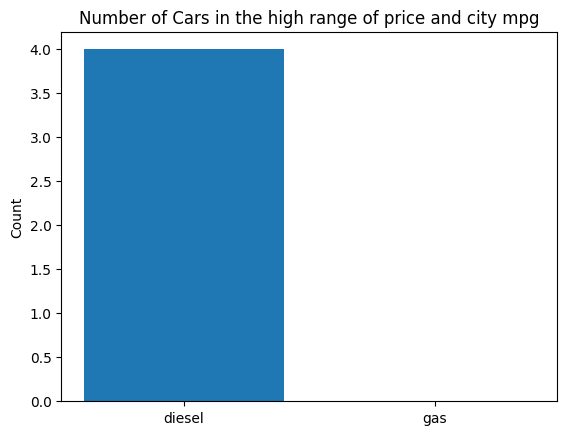

In [87]:
fig, ax = plt.subplots()

bar = ax.bar(CarsDict.keys(), CarsDict.values())
ax.set_ylabel("Count")
ax.set_title("Number of Cars in the high range of price and city mpg")
plt.show()

It appears there are only 4 cars that are in the high price and high highway mpg range. They are all Diesel cars. Therefore Diesel cars have the most in that range. 

C:\Users\Griffin\AppData\Local\Temp\ipykernel_1104\2590073003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highCars['num-of-cylinders'] = highCars['num-of-cylinders'].replace('four',4)


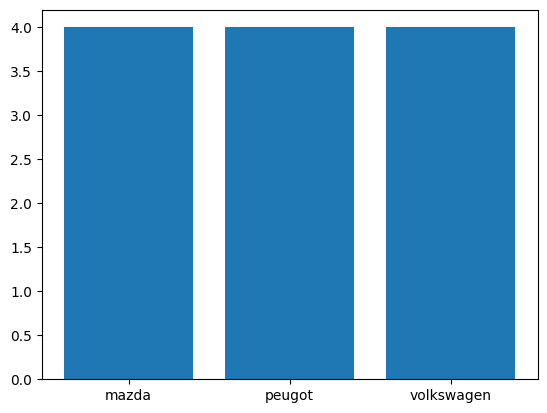

In [77]:
#amoung these cars witch is the lowest cylinder value? 
highCars['num-of-cylinders'] = highCars['num-of-cylinders'].replace('four',4)
fig, ax = plt.subplots()
bar = ax.bar(highCars['make'], height=highCars['num-of-cylinders'].astype(int))
plt.show()

All these cars have the same cylinder count, 4. 